In [1]:
import os
from PIL import Image
import torchvision.transforms as transforms
from torchvision.io import read_image

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import torch

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torchvision
torch.manual_seed(0)

In [2]:
!pip install imagesize

In [2]:
# paths
data_dir = '/LUSTRE/users/ecoinf_admin/conabio_ml_vision/examples/classification/missouri/missouri_new_files/crop_images'
animals = os.listdir(data_dir)
animals

['spiny_rat',
 'wild_boar',
 'red_brocket_deer',
 'agouti',
 'paca',
 'roe_deer',
 'white_tailed_deer',
 'ocelot',
 'red_fox',
 'common_opossum',
 'red_squirrel',
 'white-nosed_coati',
 'collared_peccary',
 'european_hare']

# Visualize data 

In [3]:
data_transform = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [4]:
def imshow(inp, title=None, ax=None, figsize=(15, 15)):
  """Imshow for Tensor."""
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  if ax is None:
    fig, ax = plt.subplots(1, figsize=figsize)
  ax.imshow(inp)
  ax.set_xticks([])
  ax.set_yticks([])
  if title is not None:
    ax.set_title(title)

In [5]:
# imagenes sin recortar
image_datasets = datasets.ImageFolder(os.path.join(data_dir),transform=data_transform)
dataloader = torch.utils.data.DataLoader(image_datasets, shuffle=True, batch_size=64,num_workers=0)
#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets.classes

In [6]:
class_names

['agouti',
 'collared_peccary',
 'common_opossum',
 'european_hare',
 'ocelot',
 'paca',
 'red_brocket_deer',
 'red_fox',
 'red_squirrel',
 'roe_deer',
 'spiny_rat',
 'white-nosed_coati',
 'white_tailed_deer',
 'wild_boar']

In [7]:
from collections import Counter
print(dict(Counter(image_datasets.targets)))
image_datasets.class_to_idx
image_dataset_targets = dict(Counter(image_datasets.targets))

{0: 202, 1: 204, 2: 205, 3: 206, 4: 201, 5: 216, 6: 200, 7: 207, 8: 201, 9: 231, 10: 205, 11: 208, 12: 204, 13: 210}


In [8]:
dict_classes = image_datasets.class_to_idx
for key in dict_classes.keys():
    count = image_dataset_targets[dict_classes[key]]
    dict_classes[key] = count
dict_classes

{'agouti': 202,
 'collared_peccary': 204,
 'common_opossum': 205,
 'european_hare': 206,
 'ocelot': 201,
 'paca': 216,
 'red_brocket_deer': 200,
 'red_fox': 207,
 'red_squirrel': 201,
 'roe_deer': 231,
 'spiny_rat': 205,
 'white-nosed_coati': 208,
 'white_tailed_deer': 204,
 'wild_boar': 210}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'agouti'),
  Text(1, 0, 'collared_peccary'),
  Text(2, 0, 'common_opossum'),
  Text(3, 0, 'european_hare'),
  Text(4, 0, 'ocelot'),
  Text(5, 0, 'paca'),
  Text(6, 0, 'red_brocket_deer'),
  Text(7, 0, 'red_fox'),
  Text(8, 0, 'red_squirrel'),
  Text(9, 0, 'roe_deer'),
  Text(10, 0, 'spiny_rat'),
  Text(11, 0, 'white-nosed_coati'),
  Text(12, 0, 'white_tailed_deer'),
  Text(13, 0, 'wild_boar')])

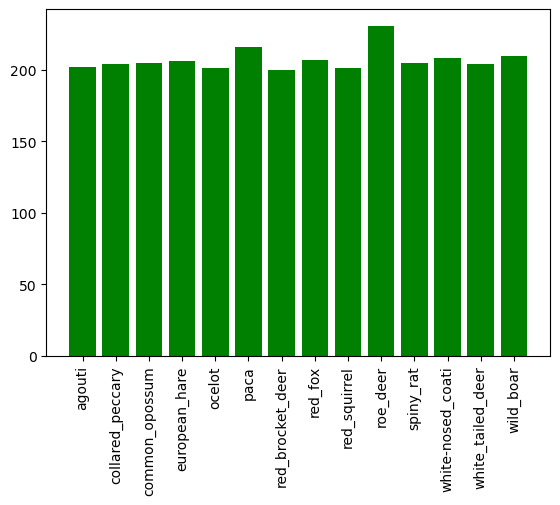

In [9]:
fig = plt.gcf()
fig.set_size_inches(6.5, 4.5)
plt.bar(dict_classes.keys(), dict_classes.values(), color='g')
plt.xticks(rotation=90)
#sns.histplot(dict_classes.keys(), dict_classes.values())

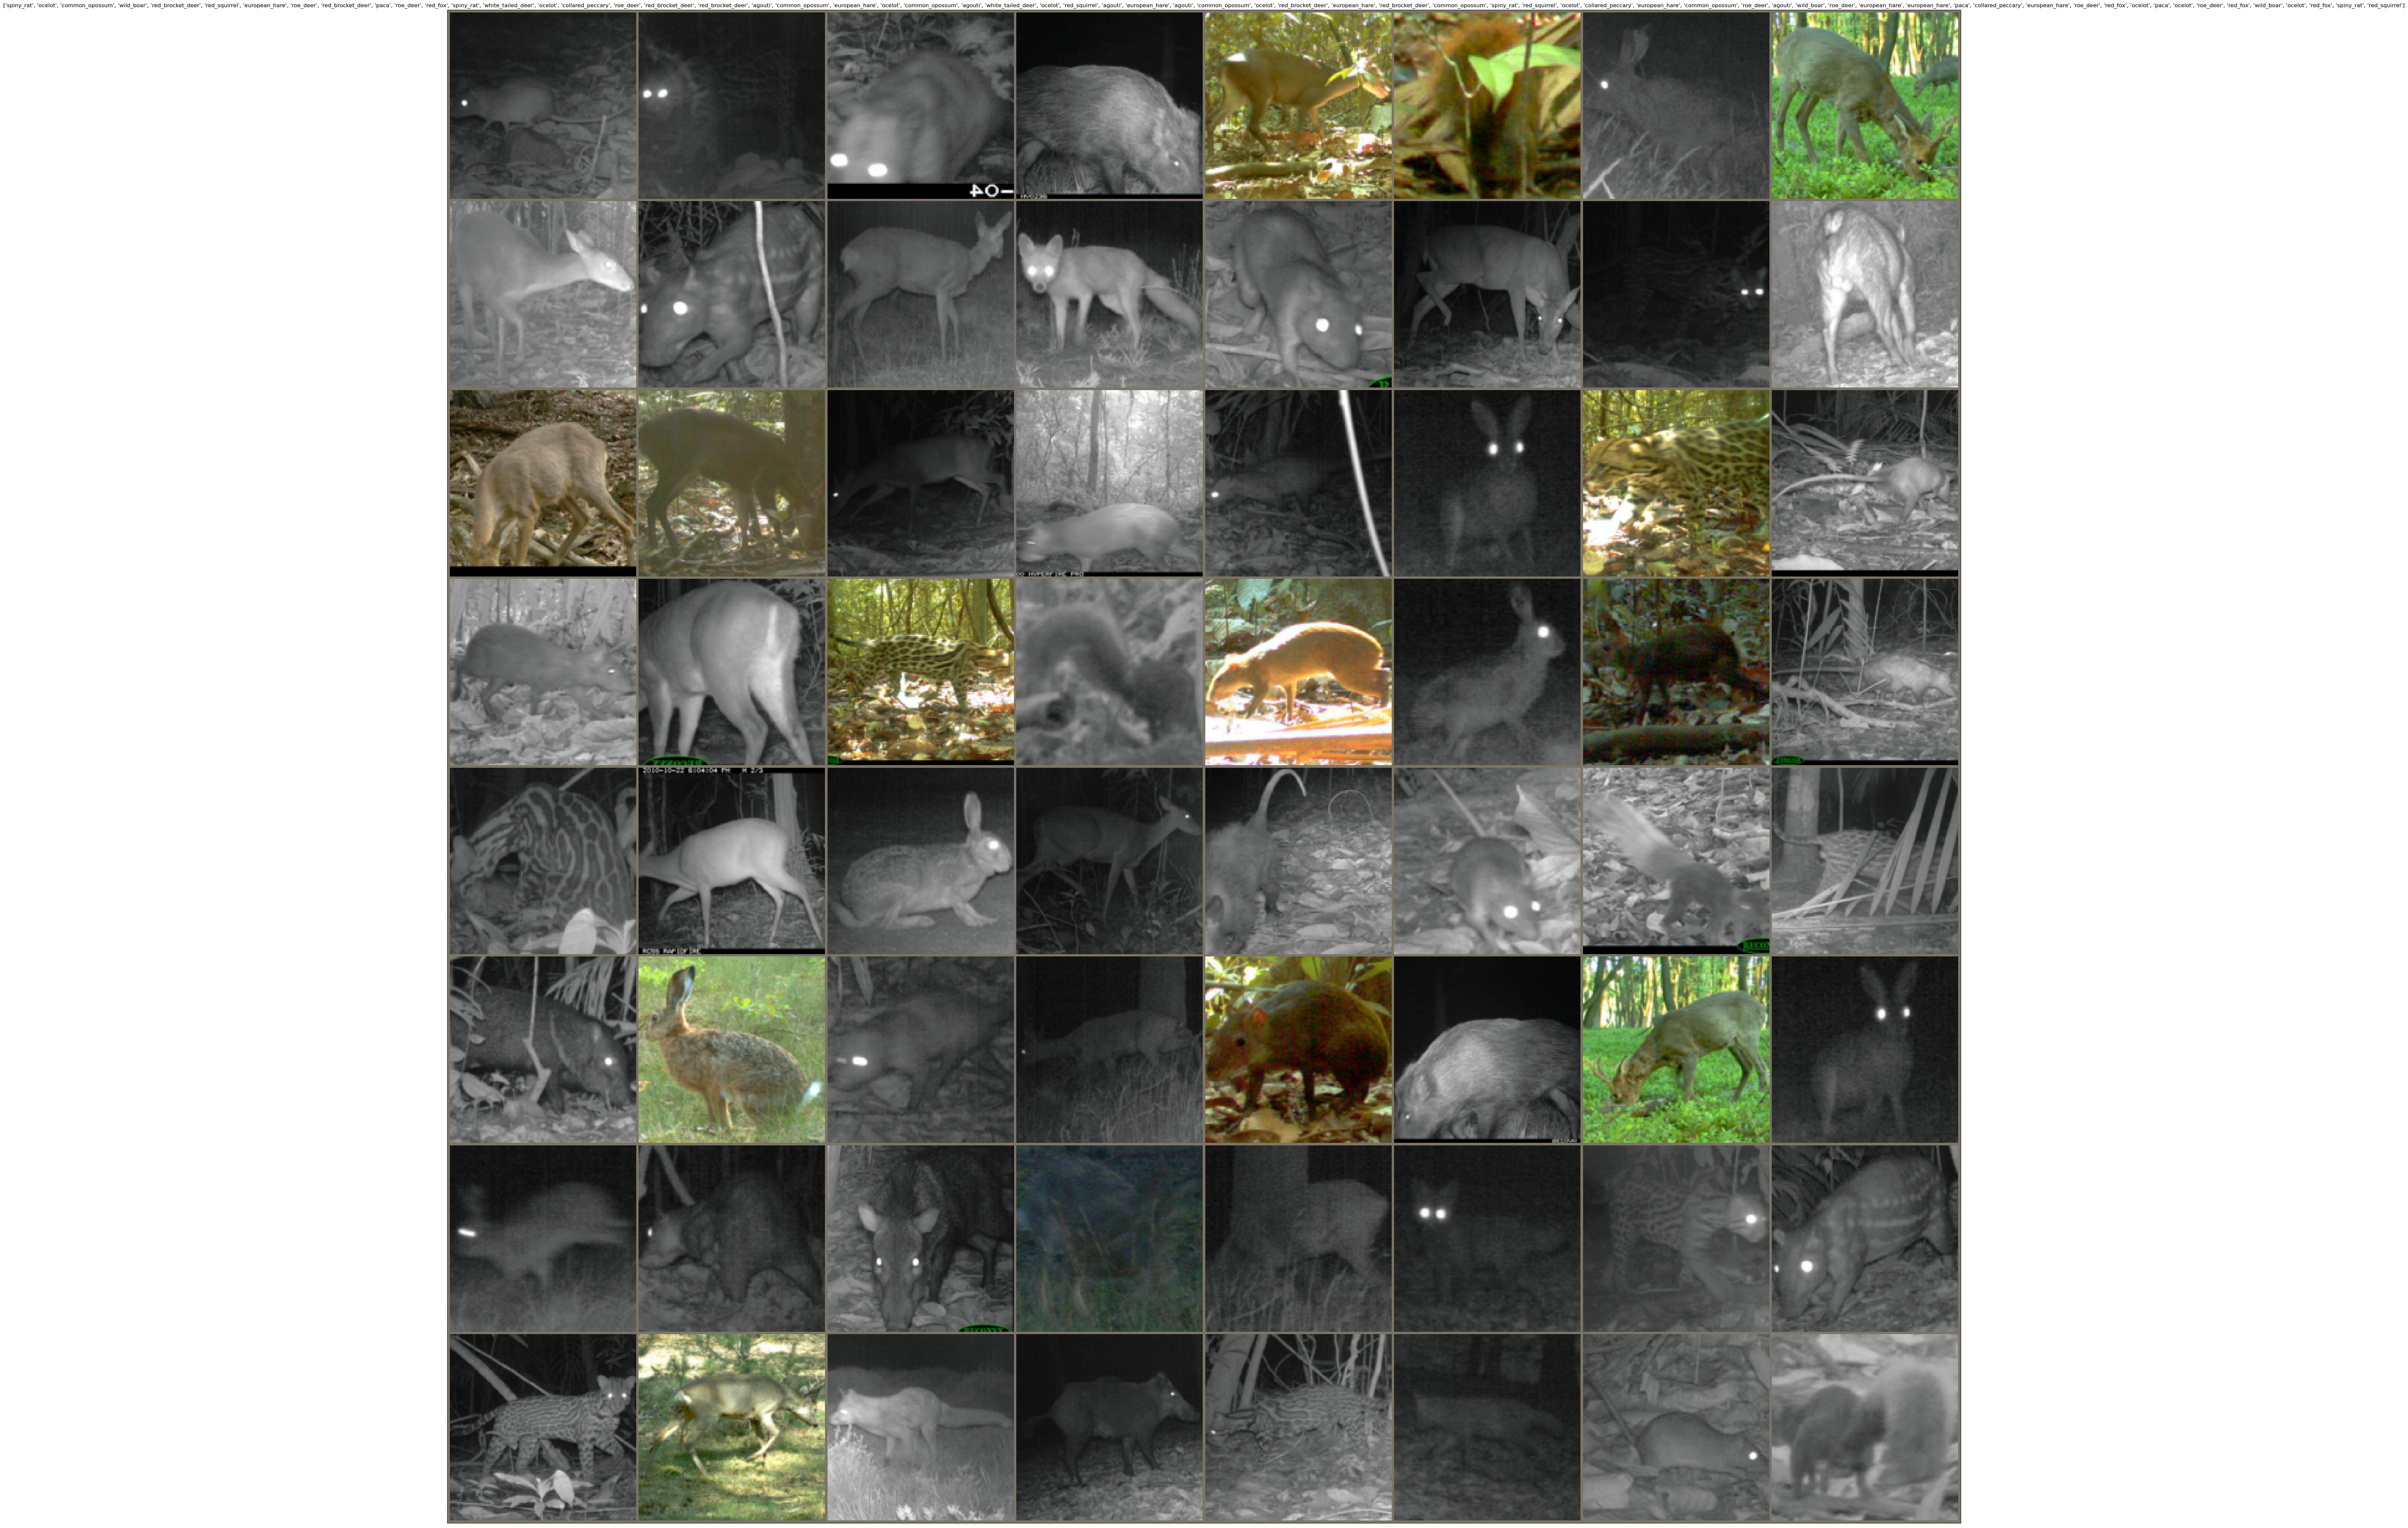

In [10]:
# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=8)

fig, ax = plt.subplots(1, figsize=(60, 60))
imshow(out, title=[class_names[x] for x in classes], ax=ax)

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize=(15, 15))
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

animals = ['/content/drive/MyDrive/Tesis/missouri/missourifiles/crops-model/train/Ocelot/35eb23e2-c90f-4996-a50a-12a12405a0d8.jpg',
           '/content/drive/MyDrive/Tesis/missouri/missourifiles/crops-model/train/Roe_deer/014224d3-daa3-4f2c-9c74-56f2730f99e5.jpg']
ORIG_IMAGE = Image.open(animals[1])

ORIG_IMAGE.size

In [11]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    """
    authors: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py
    verificar como se citan estas
    """
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False,figsize=(15, 15))
    for row_idx, row in enumerate(imgs):
        row = [ORIG_IMAGE] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

## Transformations

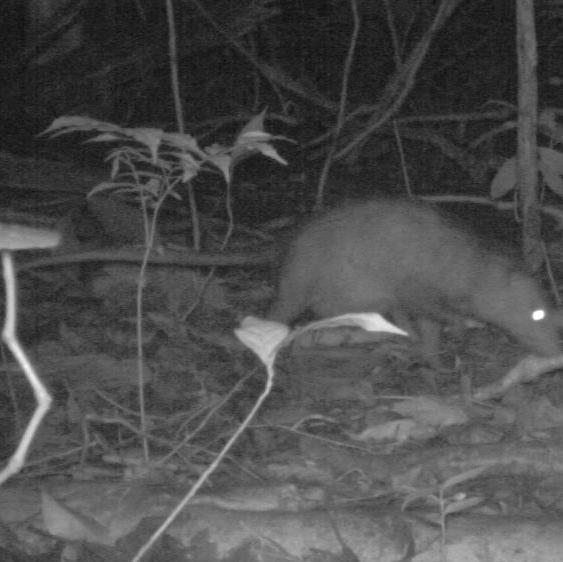

In [62]:
# Get the Image Resolutions
data_dir = '/LUSTRE/users/ecoinf_admin/conabio_ml_vision/examples/classification/missouri/missouri_new_files/crop_images'
animals = os.listdir(data_dir)
roots = [os.path.join(data_dir,x) for x in animals ]
root = roots[9]
imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
paths_imgs = [os.path.join(root,f) for f in imgs]
ORIG_IMAGE = Image.open(paths_imgs[50])
ORIG_IMAGE

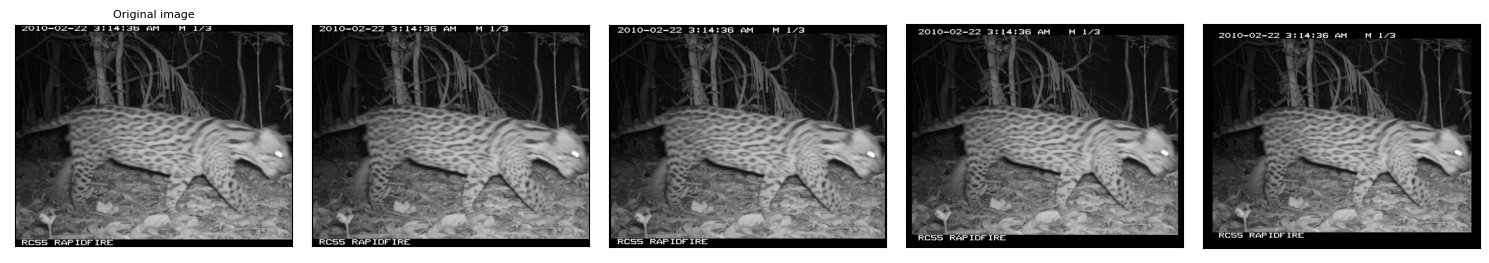

In [13]:
# pad
padded_imgs = [transforms.Pad(padding=padding)(ORIG_IMAGE) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

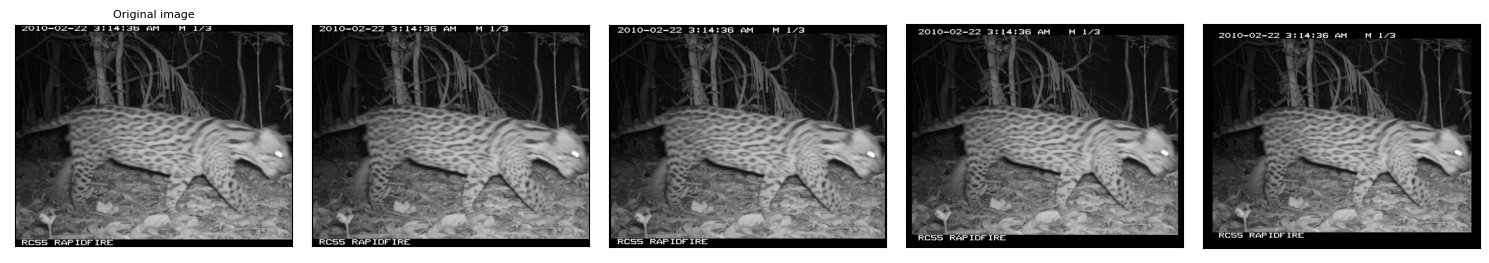

In [14]:
padded_imgs = [transforms.Pad(padding=padding)(ORIG_IMAGE) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

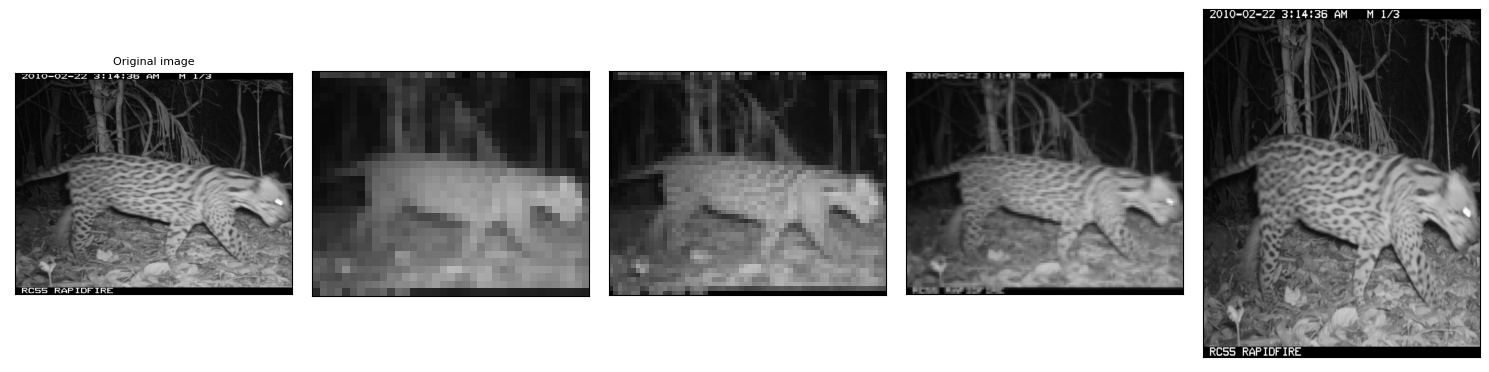

In [15]:
# Resize
resized_imgs = [transforms.Resize(size=size)(ORIG_IMAGE) for size in (30, 50, 100, ORIG_IMAGE.size)]
plot(resized_imgs)

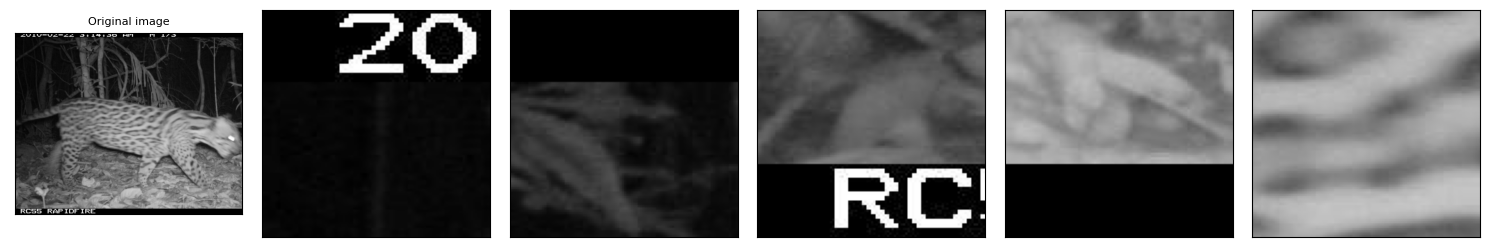

In [16]:
# five crop
(top_left, top_right, bottom_left, bottom_right, center) = transforms.FiveCrop(size=(100, 100))(ORIG_IMAGE)
plot([top_left, top_right, bottom_left, bottom_right, center])

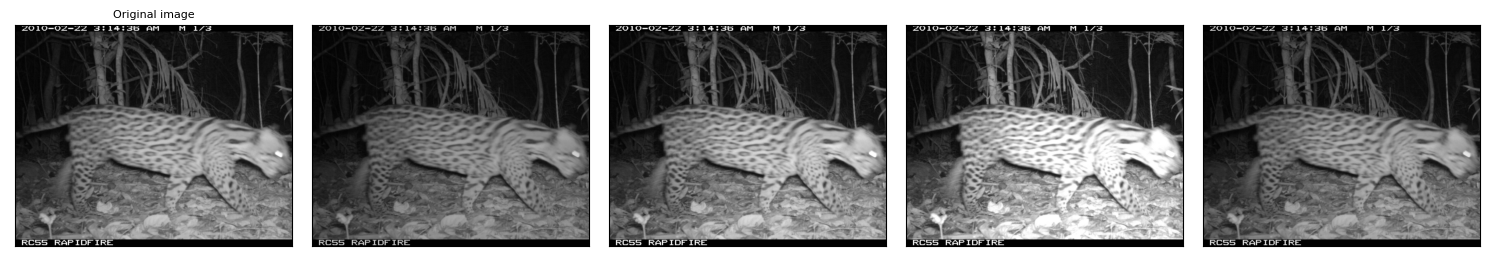

In [17]:
# Jitter
jitter = transforms.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(ORIG_IMAGE) for _ in range(4)]
plot(jitted_imgs)

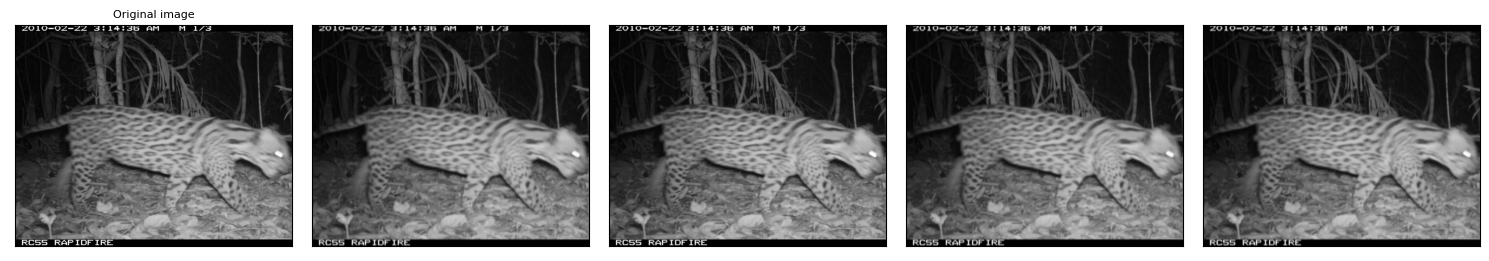

In [18]:
blurrer = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(ORIG_IMAGE) for _ in range(4)]
plot(blurred_imgs)

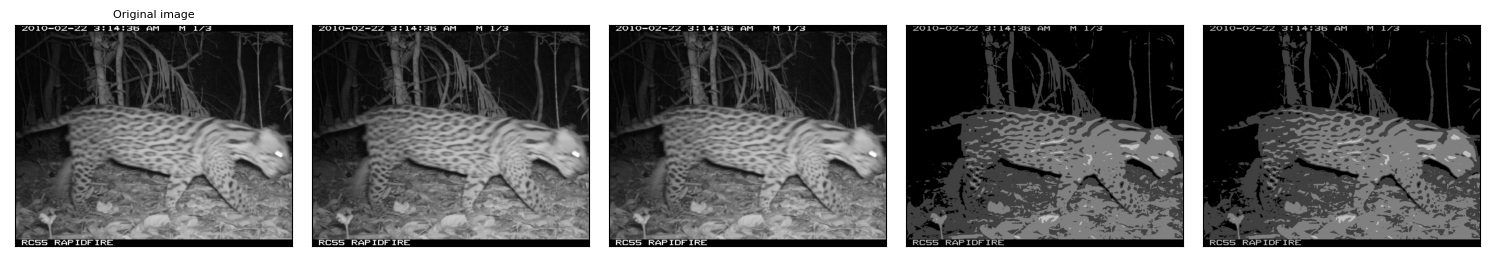

In [19]:
posterizer = transforms.RandomPosterize(bits=2)
posterized_imgs = [posterizer(ORIG_IMAGE) for _ in range(4)]
plot(posterized_imgs)

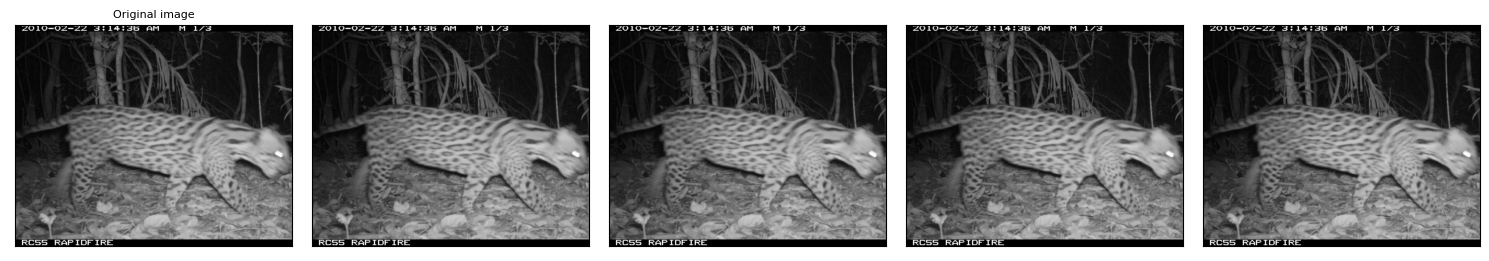

In [20]:
sharpness_adjuster = transforms.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(ORIG_IMAGE) for _ in range(4)]
plot(sharpened_imgs)

In [21]:
augmenter = transforms.AugMix()
imgs = [augmenter(ORIG_IMAGE) for _ in range(4)]
plot(imgs)

AttributeError: module 'torchvision.transforms' has no attribute 'AugMix'

In [ ]:
hflipper = transforms.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(ORIG_IMAGE) for _ in range(4)]
plot(transformed_imgs)

In [ ]:
augmenter = transforms.RandAugment(num_ops=5)
imgs = [augmenter(ORIG_IMAGE) for _ in range(7)]
plot(imgs)

In [ ]:
augmenter = transforms.TrivialAugmentWide()
imgs = [augmenter(ORIG_IMAGE) for _ in range(4)]
plot(imgs)

In [24]:
import torchvision.transforms.functional as TF
import random

class MyRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)

class MyEqualizerTransform:
    """Rotate by one of the given angles."""

    def __init__(self, arg1=None, arg2=None): 
        self.__arg1 = arg1 
        self.__arg2 = arg2

    def __call__(self, x):
        return TF.equalize(x)

In [25]:
#rotation_transform = MyRotationTransform(angles=[-30, -15, 0, 15, 30])
equalizer_transforms = MyEqualizerTransform()

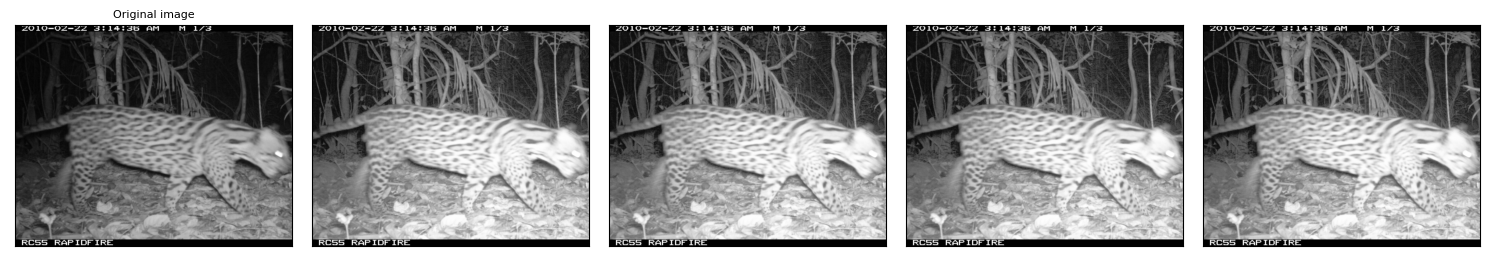

In [26]:
import torchvision.transforms.functional as TF
#equalizer = TF.equalize(ORIG_IMAGE)
equalized_imgs = [equalizer_transforms (ORIG_IMAGE) for _ in range(4)]
plot(equalized_imgs)

# Resize

In [27]:
IMAGE_SIZE = 300
resize = transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))
transformed_imgs = [resize(to_tensor(ORIG_IMAGE)) for _ in range(4)]
show(transformed_imgs)

NameError: name 'to_tensor' is not defined

In [21]:
animals = ['/content/drive/MyDrive/Tesis/missouri/missourifiles/crops-model/train/Ocelot/35eb23e2-c90f-4996-a50a-12a12405a0d8.jpg',
           '/content/drive/MyDrive/Tesis/missouri/missourifiles/crops-model/train/Roe_deer/014224d3-daa3-4f2c-9c74-56f2730f99e5.jpg']
ORIG_IMAGE = Image.open(animals[0])

In [59]:
# Identify Image Resolutions
# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import numpy as np
import imagesize

# Get the Image Resolutions
root = '/LUSTRE/users/ecoinf_admin/conabio_ml_vision/examples/classification/missouri/missouri_new_files/crop_images'
animals = os.listdir(data_dir)

transform = transforms.Compose([
    transforms.ToTensor()
])


roots = [os.path.join(data_dir,x) for x in animals ]

imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(os.path.join(root,f))

list_df = []
for root in roots:
    imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
    img_mean = {}
    for f in imgs: img_meta[str(f)] = imagesize.get(os.path.join(root,f))  
    img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
    img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
    list_df.append(img_meta_df)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

/tmp/ipykernel_5700/3969461608.py:30: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
/tmp/ipykernel_5700/3969461608.py:30: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
/tmp/ipykernel_5700/3969461608.py:30: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
/tmp/ipykernel_5700/39694616

Total Nr of Images in the dataset: 2900


/tmp/ipykernel_5700/3969461608.py:30: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)


FileName        Size  Width  Height
0  ac2122ab-4a01-442f-85e3-ab943ba30406.jpg  (461, 461)    461     461
1  29483fb8-0224-4f2a-8a84-6d420e62d7a6.jpg  (521, 520)    521     520
2  f38327b7-45fe-4fb3-8afc-9297eff96dc3.jpg  (390, 390)    390     390
3  86e2d835-9f03-4bee-afae-130ca77260db.jpg  (621, 621)    621     621
4  6c391af3-93cf-43d0-893f-5aad4ae7631d.jpg  (699, 699)    699     699

In [62]:
animals

['spiny_rat',
 'wild_boar',
 'red_brocket_deer',
 'agouti',
 'paca',
 'roe_deer',
 'white_tailed_deer',
 'ocelot',
 'red_fox',
 'common_opossum',
 'red_squirrel',
 'white-nosed_coati',
 'collared_peccary',
 'european_hare']

In [63]:
import numpy as np
np.sort([np.mean(list_df[i].Width) for i in range(len(list_df))])
np.median([np.mean(list_df[i].Width) for i in range(len(list_df))])

578.0644122725548

In [67]:
list_df[0].max()
list_df[0].min()
#np.max(list_df[0])
list_df[0]

FileName        Size  Width  Height
0    ac2122ab-4a01-442f-85e3-ab943ba30406.jpg  (461, 461)    461     461
1    29483fb8-0224-4f2a-8a84-6d420e62d7a6.jpg  (521, 520)    521     520
2    f38327b7-45fe-4fb3-8afc-9297eff96dc3.jpg  (390, 390)    390     390
3    86e2d835-9f03-4bee-afae-130ca77260db.jpg  (621, 621)    621     621
4    6c391af3-93cf-43d0-893f-5aad4ae7631d.jpg  (699, 699)    699     699
..                                        ...         ...    ...     ...
200  01a85d34-7f3d-4e10-a1b3-c3186417074b.jpg  (457, 456)    457     456
201  6e389264-17d6-4f91-932c-a6b3d3626d28.jpg  (633, 633)    633     633
202  a9470c3b-9114-4ed6-b022-bf4b10097c40.jpg  (448, 448)    448     448
203  a6937a48-5130-44d6-a88d-5e52e9d4c909.jpg  (605, 605)    605     605
204  bb5d8894-7834-42d7-b30c-a31ea8e23891.jpg  (479, 479)    479     479

[205 rows x 4 columns]

In [71]:
df_big = pd.concat([
                    list_df[0],list_df[1], list_df[2],list_df[2],
                    list_df[3],list_df[4],list_df[5],list_df[6],
                    list_df[7],list_df[8],list_df[9],list_df[10],
                    list_df[11],list_df[12],list_df[13]
                    ], ignore_index=True) 

<AxesSubplot: xlabel='Width', ylabel='Count'>

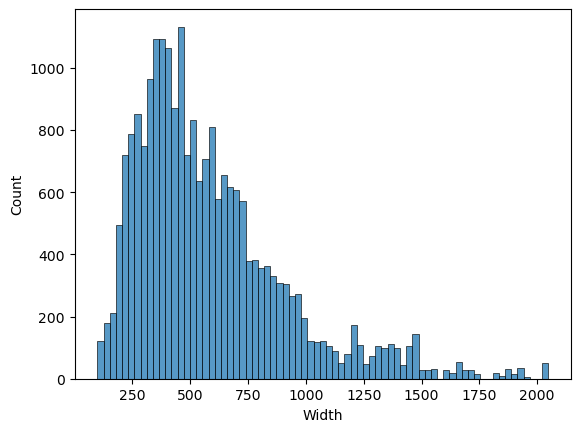

In [72]:
sns.histplot(data=df_big, x="Width")

In [83]:
from scipy import stats as st
print(df_big.describe())
print(st.mode(df_big['Width'],keepdims=True))
print(np.median(df_big['Width']))

              Width        Height
count  22424.000000  22424.000000
mean     584.449786    576.971102
std      329.993230    308.652148
min       98.000000     98.000000
25%      351.000000    351.000000
50%      502.000000    502.000000
75%      728.000000    728.000000
max     2048.000000   1536.000000
ModeResult(mode=array([371]), count=array([99]))
502.0


Text(0, 0.5, 'Height')

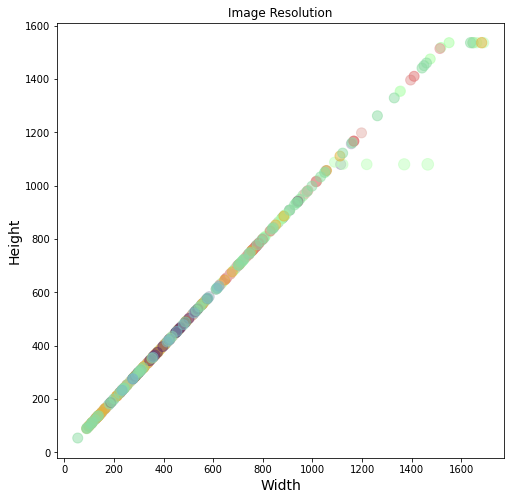

In [71]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(list_df[0].Width, list_df[0].Height, color='#A8AEC1', alpha=0.5, s=list_df[0]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[1].Width, list_df[1].Height, color='#A09EBB', alpha=0.5, s=list_df[1]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[2].Width, list_df[2].Height, color='#B5D2CB', alpha=0.5, s=list_df[2]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[3].Width, list_df[3].Height, color='#BFFFBC', alpha=0.5, s=list_df[3]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[4].Width, list_df[4].Height, color='#A6FFA1', alpha=0.5, s=list_df[4]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[5].Width, list_df[5].Height, color='#E39695', alpha=0.5, s=list_df[5]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[6].Width, list_df[6].Height, color='#DF7373', alpha=0.5, s=list_df[6]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[7].Width, list_df[7].Height, color='#E4B1AB', alpha=0.5, s=list_df[7]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[8].Width, list_df[8].Height, color='#E3B23C', alpha=0.5, s=list_df[8]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[9].Width, list_df[9].Height, color='#63326E', alpha=0.5, s=list_df[9]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[10].Width, list_df[10].Height, color='#8DDCA4', alpha=0.5, s=list_df[10]["Aspect Ratio"]*100, picker=True)
points = ax.scatter(list_df[11].Width, list_df[11].Height, color='#7DBBC3', alpha=0.5, s=list_df[11]["Aspect Ratio"]*100, picker=True)
#points = ax.scatter(list_df[12].Width, list_df[12].Height, color='#DE6B48', alpha=0.5, s=list_df[12]["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

promedios de tamañas de imagen

# Normalization

In [ ]:
# load the image


# Get the Image Resolutions
data_dir = '/LUSTRE/users/ecoinf_admin/conabio_ml_vision/examples/classification/missouri/missouri_new_files/crop_images'
animals = os.listdir(data_dir)
roots = [os.path.join(data_dir,x) for x in animals ]
root = roots[13]
imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
paths_imgs = [os.path.join(root,f) for f in imgs]
img = Image.open(paths_imgs[58])
img

Text(0.5, 1.0, 'distribution of pixels')

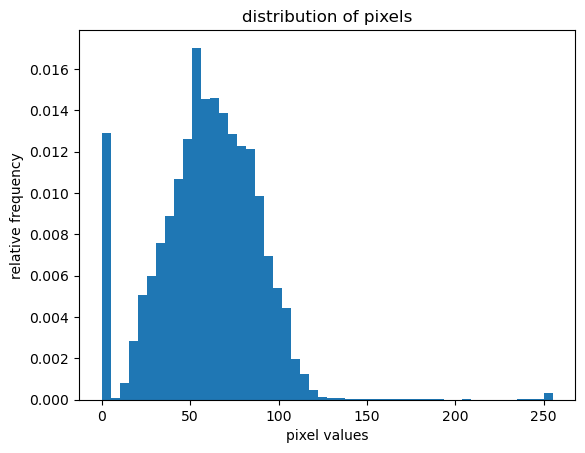

In [143]:
# convert PIL image to numpy array
img_np = np.array(img)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Text(0.5, 1.0, 'distribution of pixels')

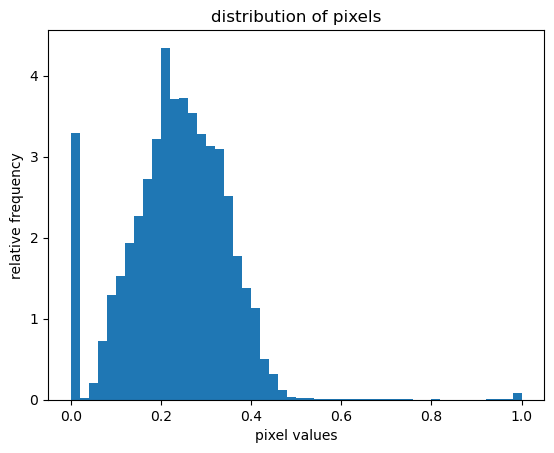

In [144]:
# define custom transform function
transform = transforms.Compose([
    transforms.ToTensor()
])
 
# transform the pIL image to tensor
# image
img_tr = transform(img)
 
# Convert tensor image to numpy array
img_np = np.array(img_tr)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

We find that pixel values of tensor image range from 0.0 to 1.0. We notice that the pixel distributions of RBG and tensor image look the same but differ in the pixel values range.

In [147]:
# Python code to calculate mean and std
# of image
 
# get tensor image
img_tr = transform(img)
 
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
 
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)
# The mean and std of ImageNet are: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]

mean and std before normalize:
Mean of the image: tensor([0.2347, 0.2347, 0.2347])
Std of the image: tensor([0.1123, 0.1123, 0.1123])


Here we calculated the mean and std of the image for all three channels Red, Green, and Blue. These values are before normalization.  We will use these values to normalize the image.

To **normalize the image**, here we use the above calculated mean and std of the image. We can also use the mean and std of the ImageNet dataset if the image is similar to ImageNet images. The mean and std of ImageNet are: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. If the image is not similar to ImageNet, like medical images, then it is always advised to calculate the mean and std of the dataset and use them to normalize the images.

Text(0.5, 1.0, 'distribution of pixels')

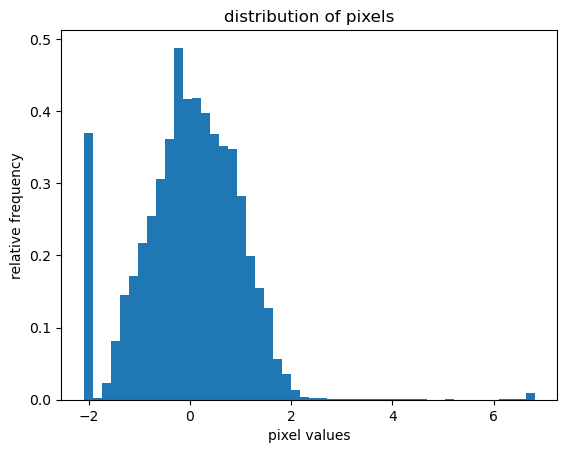

In [148]:
from torchvision import transforms
 
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
 
# get normalized image
img_normalized = transform_norm(img)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

## Visualize the normalized image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

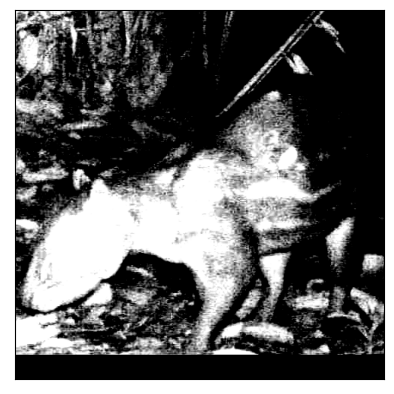

In [149]:
# Python Code to visualize normalized image
 
# get normalized image
img_normalized = transform_norm(img)
 
# convert this image to numpy array
img_normalized = np.array(img_normalized)
 
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)
 
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])

# Calculate population mean and std

In [150]:
# Identify Image Resolutions
# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import numpy as np

# Get the Image Resolutions
data_dir = '/LUSTRE/users/ecoinf_admin/conabio_ml_vision/examples/classification/missouri/missouri_new_files/crop_images'
animals = os.listdir(data_dir)

transform = transforms.Compose([
    transforms.ToTensor()
])


roots = [os.path.join(data_dir,x) for x in animals ]

#imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]

#for f in imgs: img_meta[str(f)] = imagesize.get(os.path.join(root,f))
img_mean = {}
img_std = {}
list_df = []
for root in roots:
    imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
    # get tensor image
    # calculate mean and std
    #mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
    for f in imgs: img_mean[str(f)] = transform(Image.open(os.path.join(root,f))).mean([1,2])
    for f in imgs: img_std[str(f)] = transform(Image.open(os.path.join(root,f))).std([1,2])    
img_mean_df = pd.DataFrame.from_dict([img_mean]).T.reset_index().set_axis(['FileName', 'mean'], axis='columns', inplace=False)
img_std_df = pd.DataFrame.from_dict([img_std]).T.reset_index().set_axis(['FileName', 'std'], axis='columns', inplace=False)
    #img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
    #img_meta_df["std"] = img_tr.std([1,2])
    #list_df.append(img_meta_df)

#print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
#img_meta_df.head()
#img_meta_df

/tmp/ipykernel_5700/678675533.py:33: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_mean_df = pd.DataFrame.from_dict([img_mean]).T.reset_index().set_axis(['FileName', 'mean'], axis='columns', inplace=False)
/tmp/ipykernel_5700/678675533.py:34: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_std_df = pd.DataFrame.from_dict([img_std]).T.reset_index().set_axis(['FileName', 'std'], axis='columns', inplace=False)


In [167]:
len(img_mean_df)

2900

In [112]:
sumador_mean = torch.zeros(3)
sumador_std = torch.zeros(3)
for i in range(len(img_mean_df)):
    sumador_mean += img_mean_df.iloc[i]['mean']
    sumador_std += img_std_df.iloc[i]['std']
prom_mean = sumador_mean/len(img_mean_df)
prom_std = sumador_std/len(img_std_df)

In [152]:
print('mean: ',prom_mean)
print('std: ',prom_std)

#Mean of the image: tensor([0.2347, 0.2347, 0.2347])
#Std of the image: tensor([0.1123, 0.1123, 0.1123])

mean:  tensor([0.3768, 0.3808, 0.3522])
std:  tensor([0.1328, 0.1349, 0.1317])


In [153]:
print(img_mean_df.iloc[0]['mean'])
print(img_mean_df.iloc[1]['mean'])
(img_mean_df.iloc[0]['mean']+img_mean_df.iloc[1]['mean'])/2

tensor([0.3265, 0.3265, 0.3265])
tensor([0.3811, 0.3811, 0.3811])


tensor([0.3538, 0.3538, 0.3538])

In [154]:
#applier = transforms.RandomApply(transforms=[transforms.Normalize(prom_mean, prom_std)], p=0.5)

In [161]:
train_transform = transforms.Compose([
        transforms.Resize((500,500)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.RandomApply(transforms=[transforms.Normalize(prom_mean, prom_std)], p=0.7)
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [162]:
transformed_imgs = [train_transform(img) for _ in range(10)]
#plot(transformed_imgs)

In [163]:
imgs_ = []
for _ in range(4):
# convert this image to numpy array
  img_normalized = train_transform(img)
  img_normalized = np.array(img_normalized)
 
  # transpose from shape of (3,,) to shape of (,,3)
  img_normalized = img_normalized.transpose(1, 2, 0)
  imgs_.append(img_normalized)
  # display the normalized image

In [29]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize=(15, 15))
    for i, img in enumerate(imgs):
        #img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


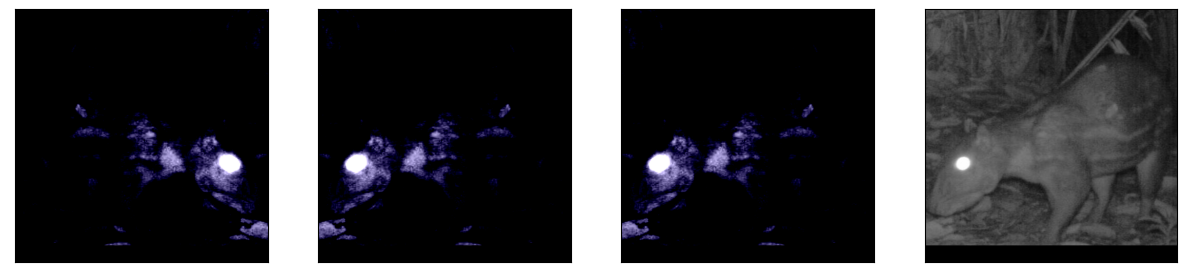

In [206]:
show(imgs_)

In [ ]:
# upon every epoch you get a different version of the dataset
#https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [200]:
#2 calculate mean and std
image_size = 500

augs = transforms.Compose([transforms.Resize((image_size,image_size)),
                           transforms.ToTensor(),
                  transforms.Normalize(mean = [0, 0, 0],
                              std  = [1, 1, 1])
                          ])
# data loader
image_dataset = datasets.ImageFolder(os.path.join(data_dir),transform=augs)
image_loader = torch.utils.data.DataLoader(image_dataset, shuffle=True, batch_size=32,num_workers=0)

In [204]:
psum    = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])
for i, batch in enumerate(image_loader):
    features = batch[0]
    labels  = batch[1]
    psum    += features.sum(axis        = [0, 2, 3])
    psum_sq += (features ** 2).sum(axis = [0, 2, 3])

In [205]:
image_size =500
# pixel count
count = len(img_mean_df) * image_size * image_size

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

mean: tensor([0.3768, 0.3809, 0.3522])
std:  tensor([0.1951, 0.1968, 0.1943])


In [6]:
train_transform = transforms.Compose([
        transforms.Resize((500,500)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.RandomApply(transforms=[transforms.Normalize([0.3768, 0.3809, 0.3522],[0.1951, 0.1968, 0.1943]
                                                               )], p=0.8)
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    #Mean of the image: tensor([0.2347, 0.2347, 0.2347]) Std of the image: tensor([0.1123, 0.1123, 0.1123])
        ])


#transformed_imgs = [train_transform(img) for _ in range(10)]

imgs_ = []
for _ in range(4):
# convert this image to numpy array
  img_normalized = train_transform(img)
  img_normalized = np.array(img_normalized)
 
  # transpose from shape of (3,,) to shape of (,,3)
  img_normalized = img_normalized.transpose(1, 2, 0)
  imgs_.append(img_normalized)
  # display the normalized image

NameError: name 'img' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


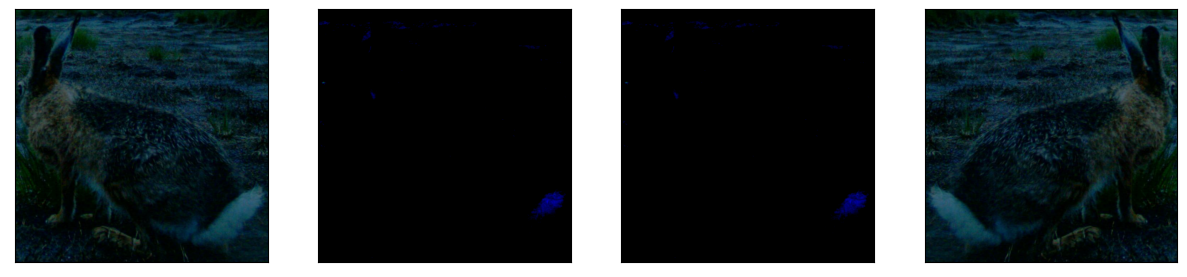

In [36]:
show(imgs_)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


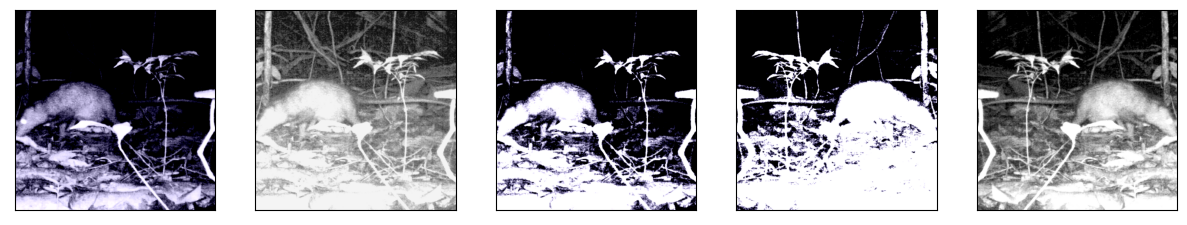

In [64]:
train_transform = transforms.Compose([
        transforms.Resize((500,500)),
        transforms.RandomHorizontalFlip(p=0.5),
        MyEqualizerTransform(),
        #transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.ColorJitter(brightness=.3,contrast=0.5,saturation=0.59,hue=.3),
        transforms.ToTensor(),
        transforms.RandomApply(transforms=[
                                transforms.Normalize([0.3768, 0.3809, 0.3522],[0.1951, 0.1968, 0.1943]),
                                ], 
                               p=0.6)
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    #Mean of the image: tensor([0.2347, 0.2347, 0.2347]) Std of the image: tensor([0.1123, 0.1123, 0.1123])
        ])

imgs_ = []
for _ in range(5):
# convert this image to numpy array
  img = ORIG_IMAGE
  img_normalized = train_transform(img)
  img_normalized = np.array(img_normalized)
 
  # transpose from shape of (3,,) to shape of (,,3)
  img_normalized = img_normalized.transpose(1, 2, 0)
  imgs_.append(img_normalized)
  # display the normalized image
show(imgs_)

## referencias
- https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

In [1]:
def save(*argv):
    return '-'.join(argv)

save('01','adam')

'01-adam'